In [1]:
import lltk
C=lltk.load('dialnarr')

In [2]:
C.meta

,id,author,title,year,gender,genre,medium,nation
0,dialogue/1825.Child.Am.F.The_Rebels_Or_Boston_...,Child,The Rebels Or Boston Before The Revolution,1825,F,Fictional Dialogue,Prose,Am
1,dialogue/1825.Paulding.Am.M.John_Bull_In_Ameri...,Paulding,John Bull In America Or The New Munchausen,1825,M,Fictional Dialogue,Prose,Am
2,dialogue/1825.Scott.Br.M.The_Talisman.dialogue,Scott,The Talisman,1825,M,Fictional Dialogue,Prose,Br
3,dialogue/1825.Sedgwick.Am.F.The_Travellers_A_T...,Sedgwick,The Travellers A Tale Designed For Young People,1825,F,Fictional Dialogue,Prose,Am
4,dialogue/1826.Cooper.Am.M.The_Last_Of_The_Mohi...,Cooper,The Last Of The Mohicans,1826,M,Fictional Dialogue,Prose,Am
...,...,...,...,...,...,...,...,...
1913,narration/1940.Wright.Am.M.Native_Son.narration,Wright,Native Son,1940,M,Fictional Narration,Prose,Am
1914,narration/1941.Cronin.Br.M.The_Keys_of_the_Kin...,Cronin,The Keys of the Kingdom,1941,M,Fictional Narration,Prose,Br
1915,narration/1941.Koestler.Br.M.Darkness_at_Noon....,Koestler,Darkness at Noon,1941,M,Fictional Narration,Prose,Br
1916,narration/1944.Winsor.Am.F.Forever_Amber.narra...,Winsor,Forever Amber,1944,F,Fictional Narration,Prose,Am


In [11]:
df=C.dtm(
    texts=C.meta[C.meta.genre!=""].id,
    n=1000,
    tfidf=True,
    meta=['genre']
)
df=df.groupby('genre').mean().T.sort_values('Fictional Dialogue')#.dropna()
df

genre,Fictional Dialogue,Fictional Narration,Fictional Txtdialogue,Fictional Txtnarration
said,0.000005,0.000049,0.0,0.0
looked,0.000007,0.000064,0.0,0.0
replied,0.000007,0.000246,0.0,0.0
had,0.000008,0.000043,0.0,0.0
seemed,0.000008,0.000072,0.0,0.0
...,...,...,...,...
s,0.000546,0.000458,0.0,0.0
it.,0.000629,0.000003,0.0,0.0
me.,0.000642,0.000005,0.0,0.0
you.,0.000648,0.000003,0.0,0.0


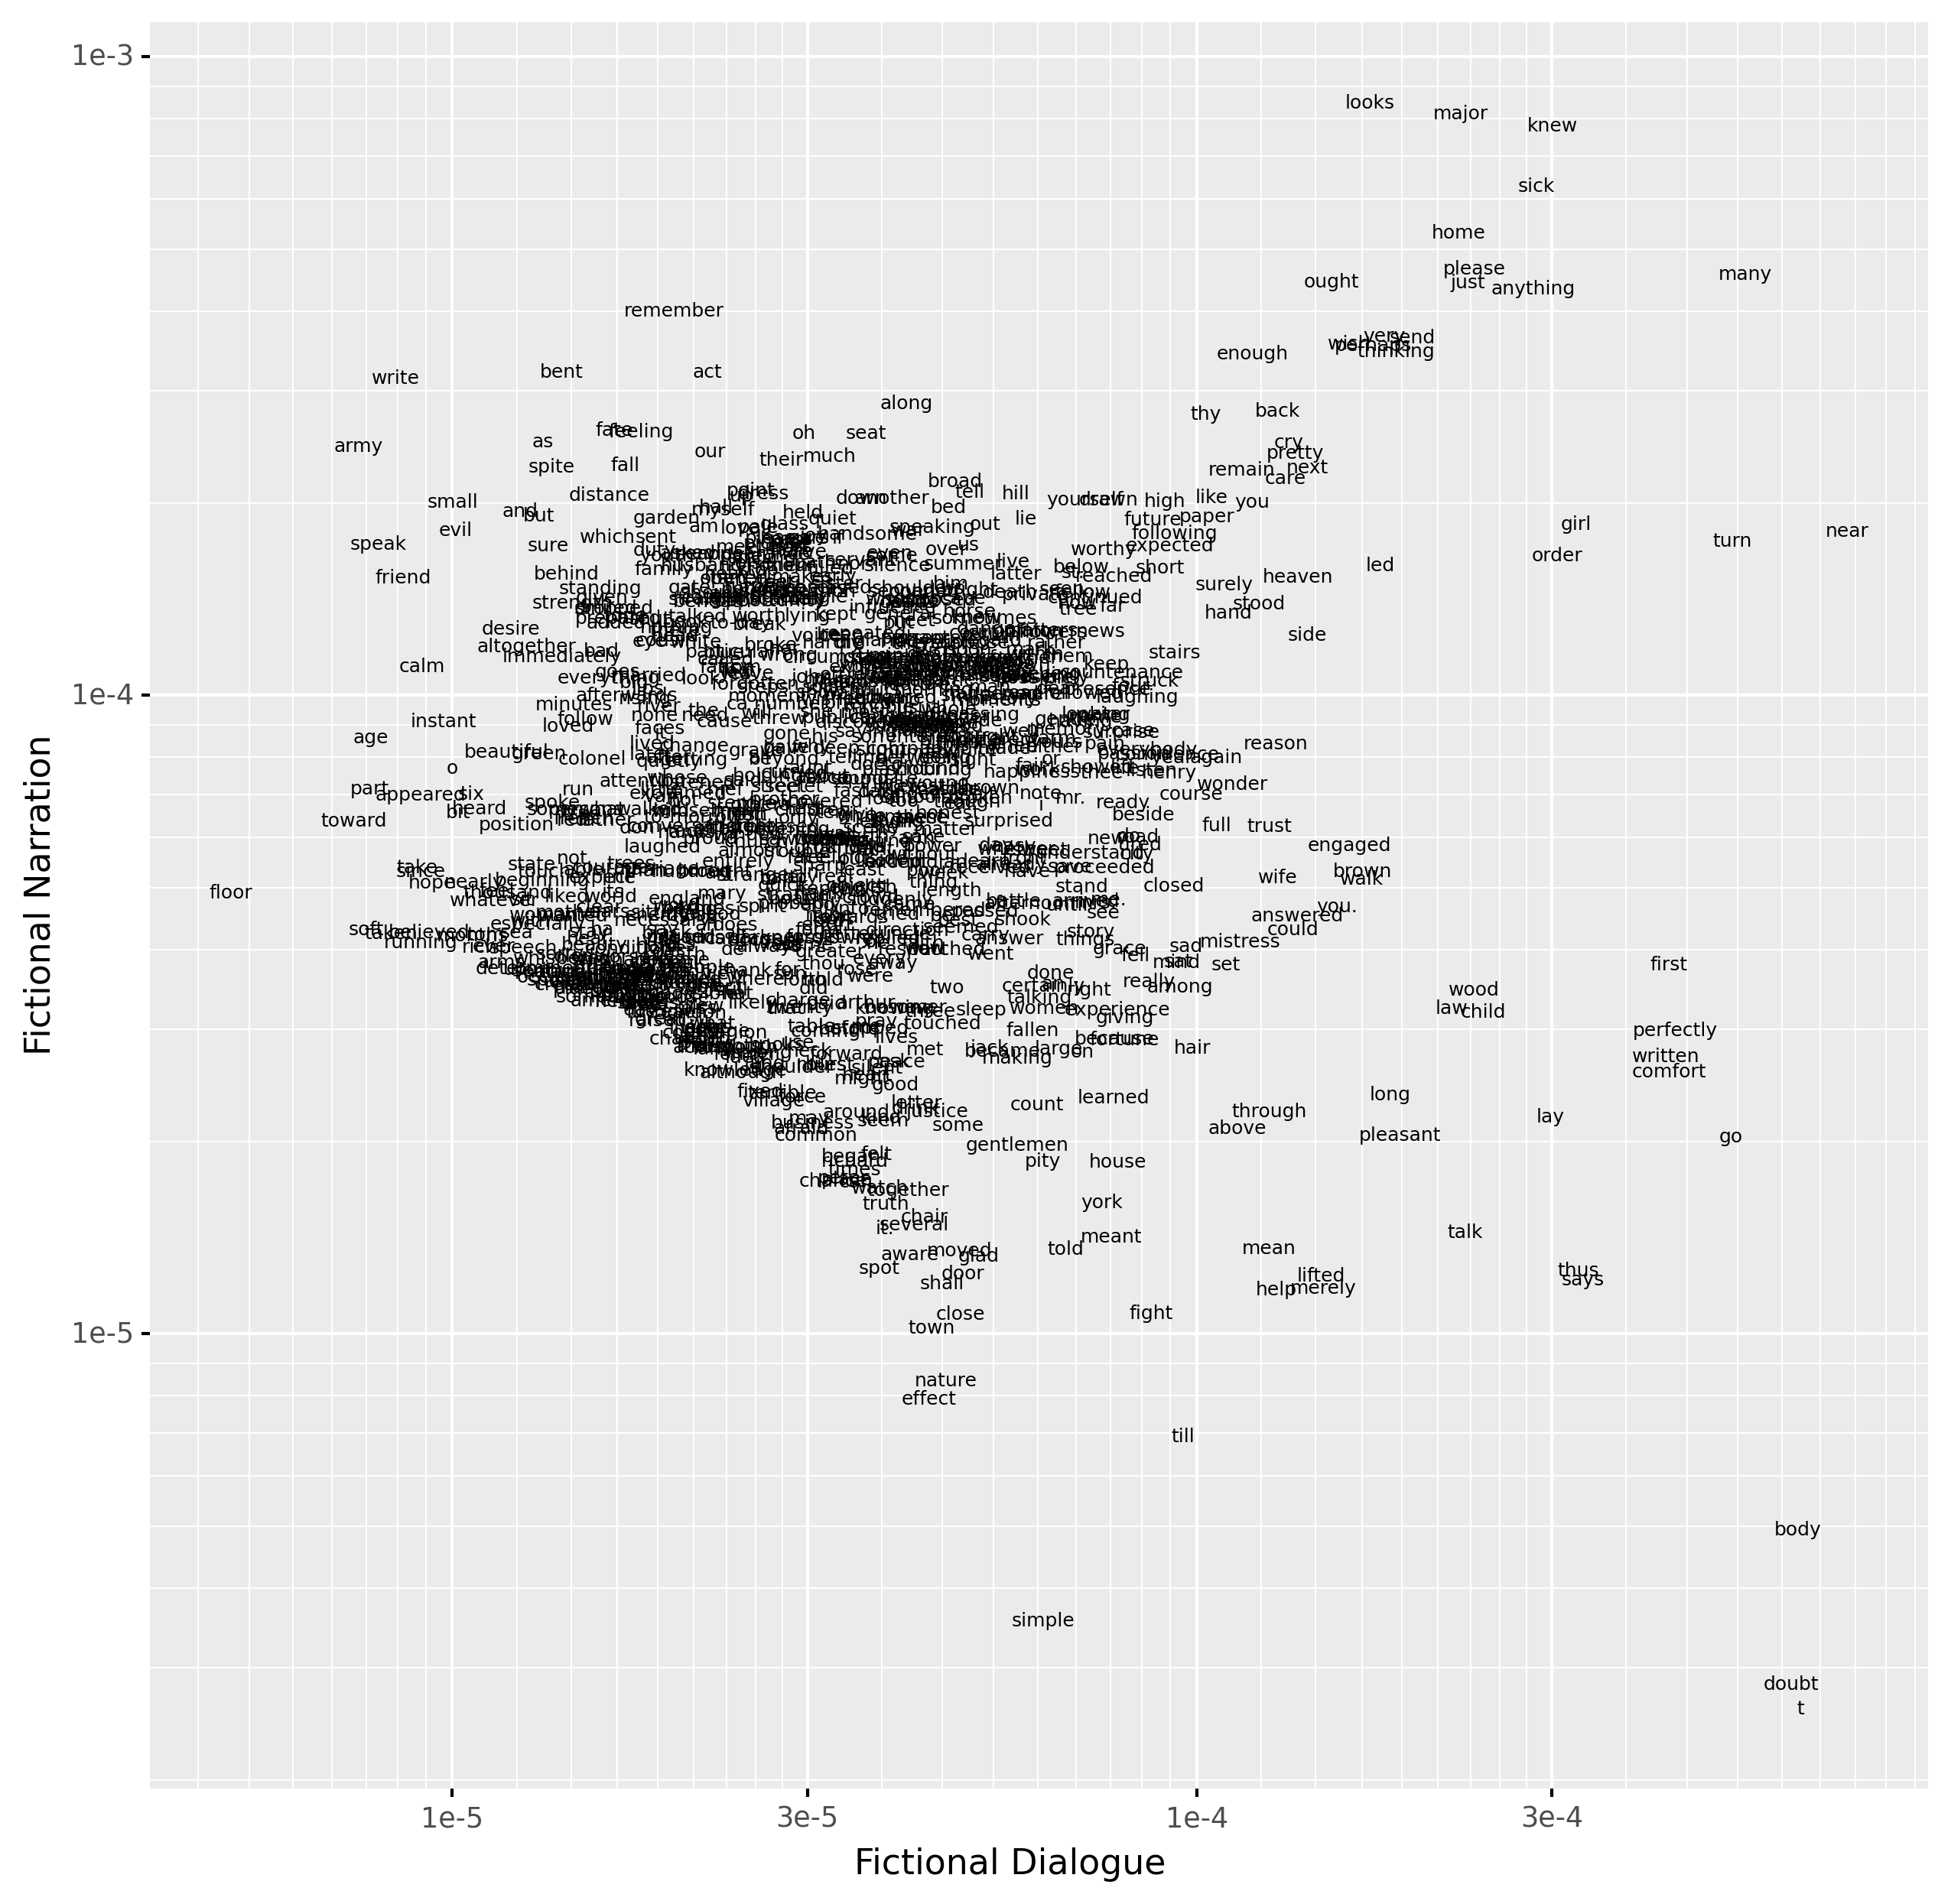

<ggplot: (8783505808805)>

In [10]:
import plotnine as p9
p9.options.figure_size=(10,10)
p9.options.dpi=300
p9.ggplot(
    p9.aes(x='Fictional Dialogue',y='Fictional Narration',label='df.index'),
    data=df.sample(n=1000)
) + p9.geom_text(size=6) + p9.scale_y_log10()  + p9.scale_x_log10()
